In [455]:
import pandas as pd
import numpy as np
import random
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, SGDRegressor
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from pprint import pprint
import time
from sklearn.preprocessing import PolynomialFeatures

%run my_models.ipynb

3.7.3


<h1> Linear Regression </h1>

In [164]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_train.shape, df_test.shape

((700, 2), (300, 2))

In [165]:
df_train.info(), df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
x    700 non-null float64
y    699 non-null float64
dtypes: float64(2)
memory usage: 11.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
x    300 non-null int64
y    300 non-null float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


(None, None)

Only 1 row for 700 instances has nan, so we can easily drop it.

In [166]:
df_train = df_train.dropna()

In [167]:
X = df_train['x'].to_numpy()
y = df_train['y'].to_numpy().ravel()
X_test = df_test['x'].to_numpy()
y_test = df_test['y'].to_numpy()

<h2> Importance of standarization - example </h2>

As we know, Linear Regression in Batch Gradient Descent version requires standarized data. Let's compare this model in situation when data is standarized and when it's not.

<h4> With standarization </h4>

In [252]:
X_std = X.copy()
X_test_std = X_test.copy()

std_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ])

X_std = std_pipeline.fit_transform(X_std.reshape(-1, 1))
X_test_std = std_pipeline.transform(X_test_std.reshape(-1, 1))

sklearn.pipeline.Pipeline

mse  9.437686534021807


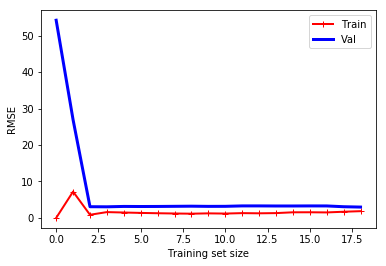

In [209]:
for i in range(6):
    lr_BGD = linear_regression_BGD()
    lr_BGD.fit(X_std,y)
y_pred = lr_BGD.predict(X_test_std)
mse = lr_BGD.mse(y_test, y_pred)
print('mse ', mse)

plot_learning_curves(lr_BGD, X_std, y, end_iteration=int(0.03*len(X_std)), start_iteration=1)

There is no fitting problem.

<h4> Without standarization </h4>

In [170]:
for i in range(6):
    lr_BGD = linear_regression_BGD()
    lr_BGD.fit(X,y)
    print(lr_BGD.theta_info()[0])

[-4.19301221e+303             -inf]
[-4.19301221e+303             -inf]
[-4.19301221e+303             -inf]
[-4.19301221e+303             -inf]
[-4.19301221e+303             -inf]
[-4.19301221e+303             -inf]


/home/areczek/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: Warning: Infinite value of theta. Further calculations may lead to errors. Path ended.
/home/areczek/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: Warning: Infinite value of theta. Further calculations may lead to errors. Path ended.
/home/areczek/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: Warning: Infinite value of theta. Further calculations may lead to errors. Path ended.
/home/areczek/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: Warning: Infinite value of theta. Further calculations may lead to errors. Path ended.
/home/areczek/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: Warning: Infinite value of theta. Further calculations may lead to errors. Path ended.
/home/areczek/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: Warning: Infinite value of theta. Further calculations may lead to errors. Path ended.


As we can see, this time theta's value is not finite. Let's try to reduce learning_rate (eta).

mse  9.460025695489794


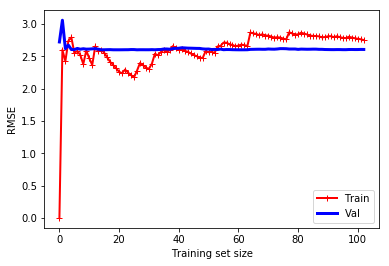

In [210]:
for i in range(6):
    lr_BGD = linear_regression_BGD()
    lr_BGD.fit(X,y, eta=0.0001)
y_pred = lr_BGD.predict(X_test)
mse = lr_BGD.mse(y_test, y_pred)
print('mse ', mse)

plot_learning_curves(lr_BGD, X, y, end_iteration=int(0.15*len(X)), start_iteration=1, model_hyperparameters={'eta':0.0001})

Conclusion 1: Not standarizing data can lead to situation, where our learning parameter is too large. So we have to reduce it, however training time increases.

<h2> Learning Curves interpretation - example </h2>

Let's train Linear Regression in Stochastic Gradient Descent version and try to interpret learning curves.

mse  9.432922192039321


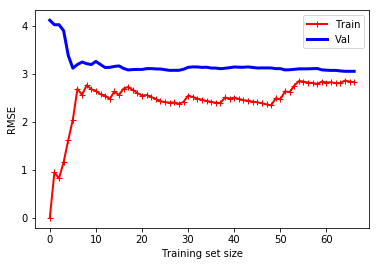

In [212]:
lr_SVD = linear_regression_SVD()
lr_SVD.fit(X_std,y)
y_pred = lr_SVD.predict(X_test_std)
mse = lr_SVD.mse(y_test, y_pred)
print('mse ', mse)

plot_learning_curves(lr_SVD, X_std, y, end_iteration=int(0.1*len(X_std)), start_iteration=2)

The model clearly underfits data. Training curve is low in the beginning, then gradually increases to a plateau. On the other hand validation curve is high in the beginning beginning and decreases to the plateu.

<h2> Theta paths of different implementations of Linear Regression </h2>

Let's train 3 Linear Regression models using BGD, SGD and MbGD, then compare its theta paths.

In [234]:
timer = {}

t0 = time.time()
lr_BGD = linear_regression_BGD()
lr_BGD.fit(X_std,y)
y_pred = lr_BGD.predict(X_test_std)
theta_path_BGD = lr_BGD.theta_info()[1]
t1 = time.time()

timer['Batch'] = t1 - t0

t0 = time.time()
lr_SGD = linear_regression_SGD()
lr_SGD.fit(X_std,y)
y_pred = lr_SGD.predict(X_test_std)
theta_path_SGD = lr_SGD.theta_info()[1]
t1 = time.time()

timer['Stochastic'] = t1 - t0

t0 = time.time()
lr_MbGD = linear_regression_MbGD()
lr_MbGD.fit(X_std,y, batch_size_ratio=0.05)
y_pred = lr_MbGD.predict(X_test_std)
theta_path_MbGD = lr_MbGD.theta_info()[1]
t1 = time.time()

timer['Mini-batch'] = t1 - t0

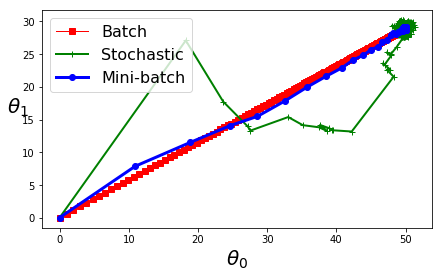

{'Batch': 0.02172994613647461,
 'Mini-batch': 0.1420888900756836,
 'Stochastic': 0.03246355056762695}


In [235]:
linear_regression_compare_paths([theta_path_BGD, theta_path_SGD, theta_path_MbGD], ['Batch', 'Stochastic', 'Mini-batch'])
pprint(timer)

As we can see, implementations behave in a very intuition way. Batch based on full gradient of a cost function chooses the shortest path, however its training time is the longest. Stochastic, based on gradients of single instances, bounces up and down, its theta path is complicated but training time is the shortest. Mini-batch centers these two solutions.

<h1> Polynomial Regression </h1>

<h2> Generate data of unknown feature degree. </h2>

In [519]:
random.seed(2)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0

degrees = random.sample(range(0, 6), 3)
constants = random.sample(range(-m, m), 3)

X = scaler.fit_transform(X)

for i in range(3):
    y = y + constants[i] * X**degrees[i]
    
scaler = StandardScaler()
               
y = y + np.random.randn(m, 1)

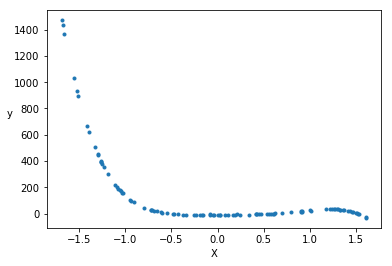

In [520]:
plt.plot(X, y, '.')
plt.xlabel('X')
plt.ylabel('y', rotation=0)
plt.show()

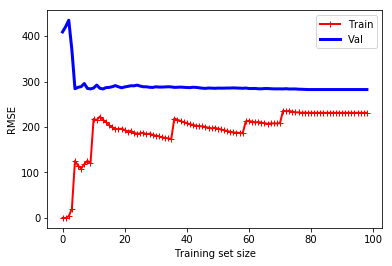

In [437]:
polynomial_regression = Pipeline([
 ("poly_features", PolynomialFeatures(degree=1, include_bias=False)),
 ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y, end_iteration = int(len(X)))

This model underfits data. Training curve starts at low level and increases to a plateau. Validation curve starts at high level and decreases to the plateau.

Let's try to increase degrees of freedom count.

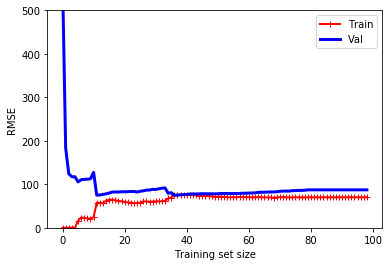

In [515]:
polynomial_regression = Pipeline([
 ("poly_features", PolynomialFeatures(degree=3, include_bias=False)),
 ("lin_reg", LinearRegression()),
])

plt.ylim([0, 500])
plot_learning_curves(polynomial_regression, X, y, end_iteration = int(len(X)))

Again, underfitting.

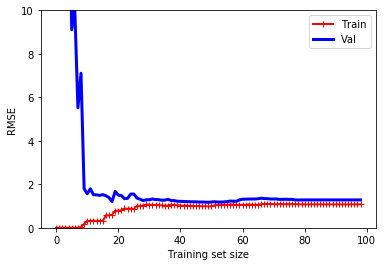

In [538]:
polynomial_regression = Pipeline([
 ("poly_features", PolynomialFeatures(degree=7, include_bias=False)),
 ("lin_reg", LinearRegression()),
])

plt.ylim([0, 10])
plot_learning_curves(polynomial_regression, X, y, end_iteration = int(len(X)))

This model has a good fit. Training curve flattens and validation curve is high in the beginning and flattens gradually. What is important, from a certain point, there is no gap between the curves.

Let's reveal degrees and constants.

In [518]:
degrees, constants

([0, 5, 4], [-8, -57, 88])